In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/lawsdiv`


In [2]:
using Random, Distributions, SpecialFunctions
using Plots, Measures
using LinearAlgebra

In [13]:
include("./models.jl")
using .GenerativeModels

include("./Distributions.jl")
using .PlotDistributions

# Distributions

### Stochastic Logistic model

In [4]:
Random.seed!(1234)

# Set parameters
N_species = 500
Δt = 0.1
n = 25000
skip = 1

# Set conditions for temporal analysis
K = 100 .* rand(LogNormal(), N_species)
# Pass y0 = K to the model so it is already at staedy state

# Solve model
data = GenerativeModels.logistic_growth(N_species, K, Δt, n; r=1.0, K=K, σ=1.0, ε=1e-3, skip=50);

555×500 Matrix{Float64}:
 263.968   37.5605   246.418    96.7729    …  216.129    29.7025    297.873
 526.997   44.1444    82.8486   89.1278       199.233    36.636      47.0636
  66.0835  38.7691   231.211    12.3492       421.022     2.40052    26.733
  94.8481  60.7799    77.0146    0.961227      65.3849   45.7259     68.1387
  39.1215  32.7617   155.999     6.99519        7.62706   5.92901   256.326
  39.1215  32.7617   155.999     6.99519   …    7.62706   5.92901   256.326
  56.0915  19.4871   315.989    42.9559       108.573     2.47454    83.9049
  38.125   25.2119   130.72     60.7128        16.9593    0.286247   39.3358
  26.0664  11.509    120.652    22.7342        19.2438    2.78885    15.0597
  26.0664  11.509    120.652    22.7342        19.2438    2.78885    15.0597
 153.595   26.4439    90.1231   46.3641    …  132.285     9.77567   113.457
 484.876   38.878     42.0502   20.8502        73.5242    7.50287   289.465
 144.148    9.61651  106.981    34.8481        67.2655   

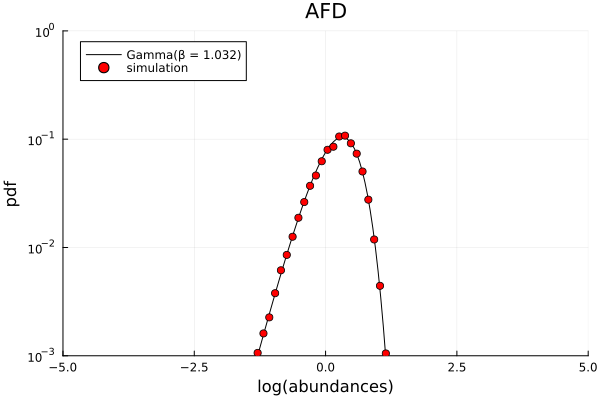

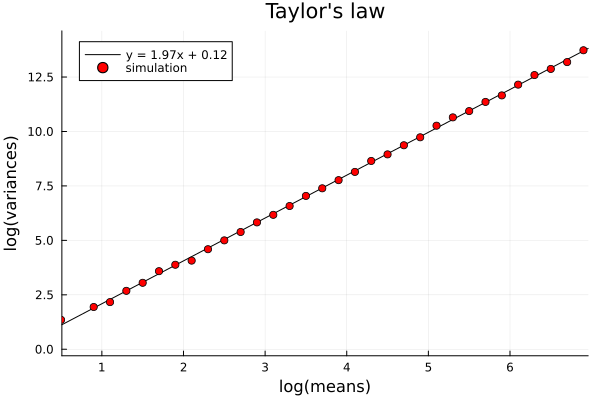

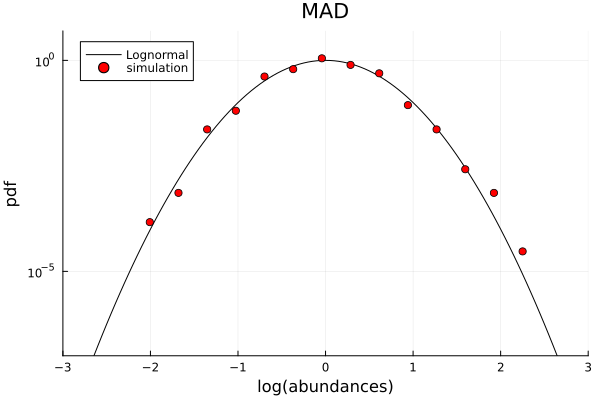

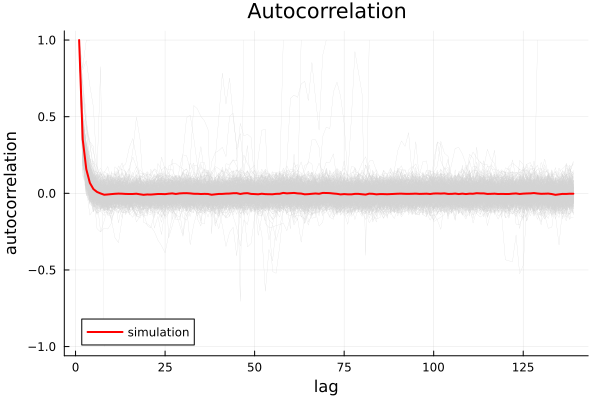

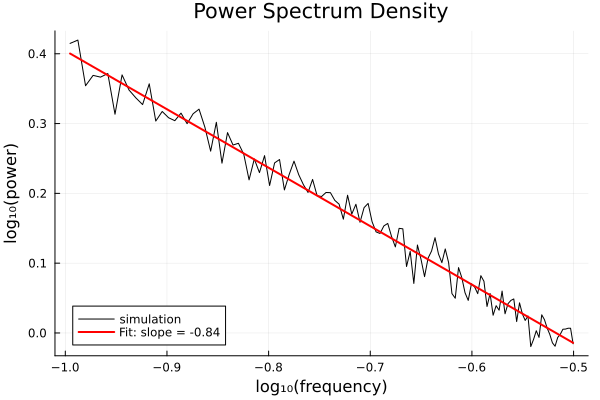

In [5]:
# Compute distributions
max_lag = Int64(floor(size(data, 1) / 4))
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
lagcorr = PlotDistributions.make_lagCorr(data; max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Autocorrelation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/SLM_AFD.png")
display(taylor["fig"])
# savefig("./Images/SLM_Taylor.png")
display(mad["fig"])
# savefig("./Images/SLM_MAD.png")
display(lagcorr["fig"])
# savefig("./Images/SLM_autocorr.png")
display(psd["fig"])
# savefig("./Images/SLM_PSD.png")

### Stochastic Exponential Growth

In [6]:
Random.seed!(1234)

# Set parameters
N_species = 500
Δt = 0.1
n = 25000
skip = 1

# Set conditions for temporal analysis
y0 = 100 .* abs.(rand(Normal(), N_species))
# y0 = 100 .* rand(N_species)
# y0 = 100 .* rand(LogNormal(), N_species)

# Solve model
data = GenerativeModels.exp_growth(N_species, y0, Δt, n; σ=1.0, p=0.0, ε=1e-3, skip=50);

500×500 Matrix{Float64}:
  97.0656   97.9218  90.1861   3.28031  …  77.0703  121.394    109.15
  36.0877   54.1722  67.0991  19.4631      18.5976   36.1587    34.9561
  52.1403  177.144   18.2769  17.5502      12.5525   29.8722    27.3962
  40.3687   36.9086  49.3616  21.3469      16.8328   75.7625    47.3128
  35.4997   57.9576  60.7919  21.9905      11.1081   46.3624    18.4767
  72.4991   41.2653  93.4145  37.7031   …  18.4863   46.0958    24.4512
 108.172    26.864   38.0872  87.7797      22.654    54.0375    55.6236
  63.2131   32.1163  12.194   20.4218      19.3807   20.3611    14.8742
  13.3765   14.192   17.3687  47.9456      33.4849   17.0043    13.2662
  14.4203   11.3002  25.658   18.0785      42.5079    9.83026   20.9834
  18.1589   23.8445  23.1888  23.1044   …  30.9103   24.5027    19.4788
  23.7396   51.3414  19.7895  13.3898      27.7556   11.7695    27.0696
  12.0781   48.5417  11.6188  12.6541      15.2911   30.18      18.9566
   ⋮                                    ⋱

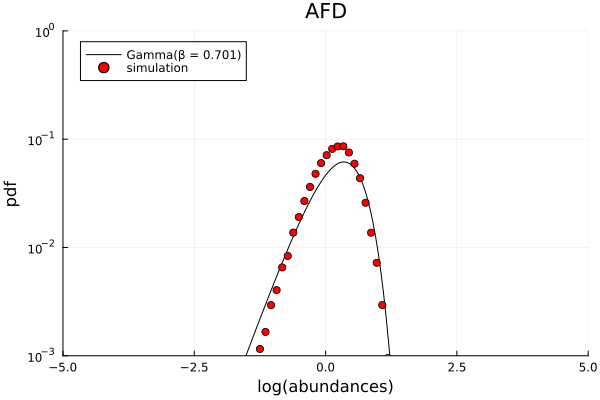

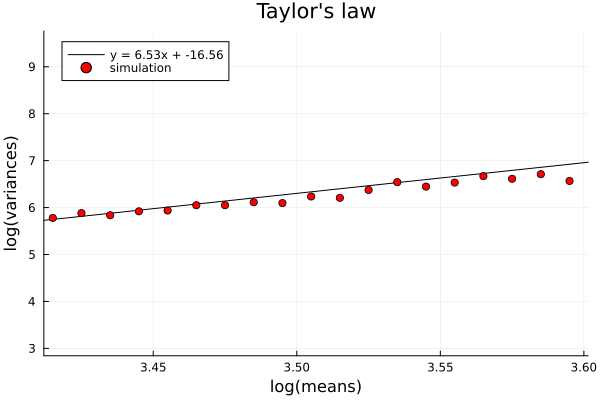

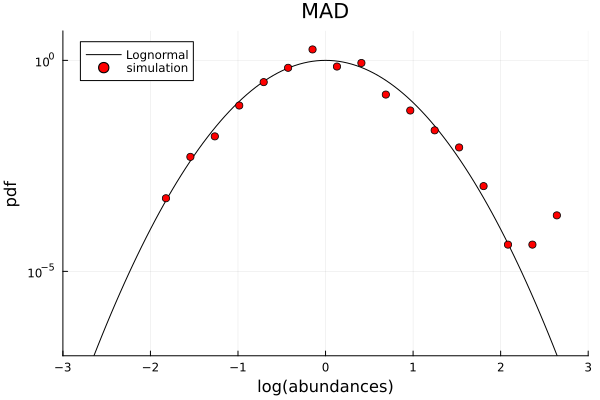

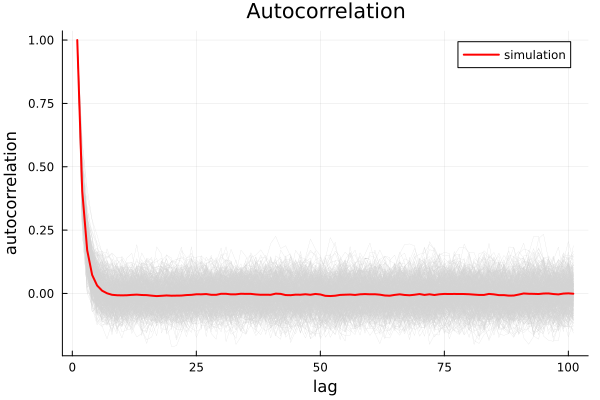

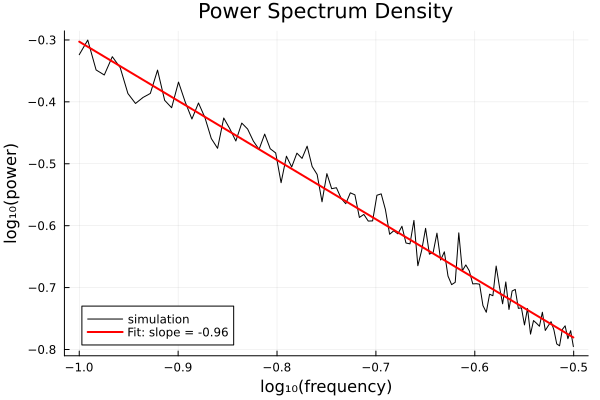

In [7]:
# Compute distributions
max_lag = Int64(floor(size(data, 1) / 5))
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.01, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.02, plot_fig=true, plot_title="MAD", data_label="simulation")
lagcorr = PlotDistributions.make_lagCorr(data; max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Autocorrelation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/exp_AFD.png")
display(taylor["fig"])
# savefig("./Images/exp_Taylor.png")
display(mad["fig"])
# savefig("./Images/exp_MAD.png")
display(lagcorr["fig"])
# savefig("./Images/exp_autocorr.png")
display(psd["fig"])
# savefig("./Images/exp_PSD.png")

### Stochastic Lotka Volterra

In [14]:
Random.seed!(1234)

# Set parameters
N_species = 500
Δt = 0.1
n = 25000
skip = 1

# Set conditions for temporal analysis
K = rand(LogNormal(), N_species)
A = GenerativeModels.sparse_gaussian_matrix(K, 1e-4; μ=-2/N_species, σ=1/sqrt(N_species))

# Solve model
data = GenerativeModels.lotka_volterra(N_species, K, Δt, n; r=1.0, A=Matrix(A), σ=1.0, ε=1e-3, skip=50);

In [20]:
A

500×500 SparseArrays.SparseMatrixCSC{Float64, Int64} with 524 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠄⠀⠀⠀⠑⢄⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠀⎥
⎢⠈⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠂⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⡀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠓⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [ ]:
# Compute distributions
max_lag = Int64(floor(size(data, 1) / 5))
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
lagcorr = PlotDistributions.make_lagCorr(data; max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Autocorrelation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; freq_range=(-1.0,-0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/SLV_AFD.png")
display(taylor["fig"])
# savefig("./Images/SLV_Taylor.png")
display(mad["fig"])
# savefig("./Images/SLV_MAD.png")
display(lagcorr["fig"])
# savefig("./Images/SLV_autocorr.png")
display(psd["fig"])
# savefig("./Images/SLV_PSD.png")